# **Dataset**
*Creazione, Caricamento, Pulizia, Salvataggio e Esplorazione dei dati del dataset*

### **Import delle dipendenze**
*Importazione delle librerie utilizzate*

In [32]:
import pandas as pd
import datetime
import io


import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.float_format", lambda x: "%.2f" % x)
pd.options.mode.chained_assignment = None

from IPython.display import Markdown

def bold(string):
    display(Markdown("**" + string + "**"))

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

### **Creazione del dataset**
*combinazione de due dataset per ampliare lo spettro dei dati, evidenziando le carattistiche ottimali dei due dataset*

In [33]:
def join_csv_by_name(df1, df2, output_file):
    # Esegui il join basato sulla colonna 'name'
    merged_df = pd.merge(df1, df2, on='name', how='inner')

    # Salva il risultato in un nuovo file CSV
    merged_df.to_csv(output_file, index=False)

    print(f"File unito salvato come {output_file}")

In [34]:

df1 = pd.read_csv('../data/row/games-data.csv')
df1 = df1.rename(columns={"user score":"user_score"})
df1 = df1.rename(columns={"Name":"name"})
drop_columns = ['platform','r-date']
df1 = df1.drop(columns=drop_columns)

df2 = pd.read_csv('../data/row/game_info.csv')
drop_columns = ['id','slug','tba','website','esrb_rating']
df2 = df2.drop(columns=drop_columns)

path_output = '../data/intermediates/join_data.csv'
# Esempio di utilizzo
join_csv_by_name(df1, df2, path_output)

File unito salvato come ../data/intermediates/join_data.csv


## **Caricamento del dataset**

In [35]:
# Caricamento dei dati
def load_data(file_path):
    try:
        data = pd.read_csv(file_path)
        print("Dati caricati con successo!")
        return data
    except Exception as e:
        print(f"Errore nel caricamento dei dati: {e}")
        return None

# Carica i dati
file_path = '../data/intermediates/join_data.csv'
df = load_data(file_path)
print("Dimensione del dataset =", df.shape)
df.head(2)

Dati caricati con successo!
Dimensione del dataset = (13527, 29)


,name,score,user_score,developer,genre,players,critics,users,metacritic,released,updated,rating,rating_top,playtime,achievements_count,ratings_count,suggestions_count,game_series_count,reviews_count,platforms,developers,genres,publishers,added_status_yet,added_status_owned,added_status_beaten,added_status_toplay,added_status_dropped,added_status_playing
0,The Legend of Zelda: Ocarina of Time,99,9.1,Nintendo,"Action Adventure,Fantasy",1 Player,22,5749,99.00,1998-11-21,2019-12-28T07:41:43,4.39,5,7,0,553,349,19,559,Wii U||GameCube||Wii||Nintendo 64,Nintendo,Action||Adventure||RPG,Nintendo,42,267,488,102,108,26
1,Tony Hawk's Pro Skater 2,98,7.4,NeversoftEntertainment,"Sports,Alternative,Skateboarding",1-2,19,647,91.00,2000-09-19,2019-10-27T22:44:57,4.37,5,0,0,258,423,4,259,Dreamcast||Nintendo 64||PC||Classic Macintosh||Game Boy Color||PlayStation||iOS||Game Boy Advance,Aspyr Media||Treyarch||Neversoft Entertainment||Neversoft,Sports||Arcade,Activision Blizzard,8,100,197,10,84,4


In [36]:
def df_stats(data):
    bold("**" + " SHAPE ".center(50, "#") + "**")
    print("ROWS: {}".format(data.shape[0]))
    print("COLUMNS: {}".format(data.shape[1]))
    bold("**" + " TYPES ".center(50, "#") + "**")
    print(data.dtypes)
    bold("**" + " MISSING VALUES ".center(50, "#") + "**")
    print(data.isnull().sum())
    bold("**" + " DUPLICATED VALUES ".center(50, "#") + "**")
    print("NUMBER OF DUPLICATED VALUES: {}".format(data.duplicated().sum()))
    bold("**" + " MEMORY USAGE ".center(50, "#") + "**")
    buf = io.StringIO()
    data.info(buf=buf)
    info = buf.getvalue().split("\n")[-2].split(":")[1].strip()
    print("Memory Usage: {}".format(info))
    bold("**" + " DESCRIBE ".center(50, "#") + "**")
    print(data.describe().T)

In [37]:
df_stats(df)

****##################### SHAPE ######################****

ROWS: 13527
COLUMNS: 29


****##################### TYPES ######################****

name                     object
score                     int64
user_score               object
developer                object
genre                    object
players                  object
critics                   int64
users                     int64
metacritic              float64
released                 object
updated                  object
rating                  float64
rating_top                int64
playtime                  int64
achievements_count        int64
ratings_count             int64
suggestions_count         int64
game_series_count         int64
reviews_count             int64
platforms                object
developers               object
genres                   object
publishers               object
added_status_yet          int64
added_status_owned        int64
added_status_beaten       int64
added_status_toplay       int64
added_status_dropped      int64
added_status_playing      int64
dtype: object


****################# MISSING VALUES #################****

name                       0
score                      0
user_score                 0
developer                  0
genre                      0
players                   19
critics                    0
users                      0
metacritic              7740
released                 250
updated                    0
rating                     0
rating_top                 0
playtime                   0
achievements_count         0
ratings_count              0
suggestions_count          0
game_series_count          0
reviews_count              0
platforms                 10
developers              1001
genres                  1285
publishers               856
added_status_yet           0
added_status_owned         0
added_status_beaten        0
added_status_toplay        0
added_status_dropped       0
added_status_playing       0
dtype: int64


****############### DUPLICATED VALUES ################****

NUMBER OF DUPLICATED VALUES: 42


****################## MEMORY USAGE ##################****

Memory Usage: 3.0+ MB


****#################### DESCRIBE ####################****

                        count   mean     std   min    25%    50%    75%  \
score                13527.00  70.45   12.46 11.00  63.00  72.00  79.00   
critics              13527.00  23.61   17.57  0.00  11.00  18.00  31.00   
users                13527.00 187.61 1445.74  0.00  11.00  29.00  93.00   
metacritic            5787.00  74.17   10.88 22.00  68.00  76.00  82.00   
rating               13527.00   2.29    1.77  0.00   0.00   3.14   3.80   
rating_top           13527.00   2.53    1.91  0.00   0.00   4.00   4.00   
playtime             13527.00   3.44   10.58  0.00   0.00   1.00   3.00   
achievements_count   13527.00  43.02   69.83  0.00   0.00  12.00  64.00   
ratings_count        13527.00 113.64  296.39  0.00   2.00  14.00  74.00   
suggestions_count    13527.00 372.03  198.87  0.00 239.00 380.00 519.00   
game_series_count    13527.00   1.50    4.31  0.00   0.00   0.00   0.00   
reviews_count        13527.00 114.65  299.02  0.00   2.00  14.00  75.00   
added_status_yet     1352

## **Pulizia del dataset**

### **Gestione dei valori mancanti**

In [38]:
df.drop(['metacritic','developer','genres'], axis=1, inplace=True)

In [39]:
df = df.dropna()
df.shape

(11918, 26)

### **Gestione dei tipi di dato**

In [40]:
# Identifica e rimuove direttamente le righe con valori non validi nella colonna 'user_score'
df = df[pd.to_numeric(df['user_score'], errors='coerce').notnull()]

# Converte in numerico la colonna 'user_score'
df['user_score'] = pd.to_numeric(df['user_score'])

In [41]:

#--------------------COLONNA 'RELEASED'-----------------------

def convert_year(obj):
    dto = datetime.datetime.strptime(obj, '%Y-%m-%d')
    return dto.year

def convert_month(obj):
    dto = datetime.datetime.strptime(obj, '%Y-%m-%d')
    return dto.month

def convert_day(obj):
    dto = datetime.datetime.strptime(obj, '%Y-%m-%d')
    return dto.day

# Estrazione dell'anno, mese, giorno e giorno della settimana dalla colonna 'date'
df['released_year'] = df['released'].apply(convert_year)
df['released_month'] = df['released'].apply(convert_month)
df['released_day'] = df['released'].apply(convert_day)

#-----------------COLONNA 'UPDATED'-------------------------

def convert_year_updated(obj):
    dto = datetime.datetime.strptime(obj, '%Y-%m-%dT%H:%M:%S')
    return dto.year

def convert_month_updated(obj):
    dto = datetime.datetime.strptime(obj, '%Y-%m-%dT%H:%M:%S')
    return dto.month

def convert_day_updated(obj):
    dto = datetime.datetime.strptime(obj, '%Y-%m-%dT%H:%M:%S')
    return dto.day

# Estrazione dell'anno, mese, giorno e giorno della settimana dalla colonna 'date'
df['updated_year'] = df['updated'].apply(convert_year_updated)
df['updated_month'] = df['updated'].apply(convert_month_updated)
df['updated_day'] = df['updated'].apply(convert_day_updated)


### **Gestione dei valori categorici**

In [42]:
top_100_publisher = list(df['publishers'].value_counts().head(100).keys())
top_100_developer = list(df['developers'].value_counts().head(100).keys())


In [43]:
def find_in_top_publishers(text):
    if text in top_100_publisher:
        return 1
    else:
        return 0

In [44]:
def find_in_top_developers(text):
    if text in top_100_developer:
        return 1
    else:
        return 0

In [45]:
df['is_in_top_100_publisher'] = df['publishers'].apply(find_in_top_publishers)

In [46]:
df['is_in_top_100_developer'] = df['developers'].apply(find_in_top_developers)

In [47]:
df['genre'] = df['genre'].astype(str)

In [48]:
df['platforms'] = df['platforms'].astype(str)

In [49]:
df['publishers'] = df['publishers'].astype(str)

In [50]:
df['developers'] = df['developers'].astype(str)

In [51]:
def clear_virgola(text):
    text = text.split(r',')[0].strip()
    return text

def clear_parenthesis(text):
    text = text.split('||')[0].strip()
    return text

In [52]:
df['genery'] = df['genre'].apply(clear_virgola)

In [53]:
df['platform'] = df['platforms'].apply(clear_parenthesis)

In [54]:
df['publisher'] = df['publishers'].apply(clear_parenthesis)

In [55]:
df['developer'] = df['developers'].apply(clear_parenthesis)

In [56]:
df.drop(['genre','released', 'updated', 'platforms','players','score','publishers','developers'], axis=1, inplace=True)

In [57]:
df.head(3)

,name,user_score,critics,users,rating,rating_top,playtime,achievements_count,ratings_count,suggestions_count,game_series_count,reviews_count,added_status_yet,added_status_owned,added_status_beaten,added_status_toplay,added_status_dropped,added_status_playing,released_year,released_month,released_day,updated_year,updated_month,updated_day,is_in_top_100_publisher,is_in_top_100_developer,genery,platform,publisher,developer
0,The Legend of Zelda: Ocarina of Time,9.10,22,5749,4.39,5,7,0,553,349,19,559,42,267,488,102,108,26,1998,11,21,2019,12,28,1,1,Action Adventure,Wii U,Nintendo,Nintendo
1,Tony Hawk's Pro Skater 2,7.40,19,647,4.37,5,0,0,258,423,4,259,8,100,197,10,84,4,2000,9,19,2019,10,27,1,0,Sports,Dreamcast,Activision Blizzard,Aspyr Media
2,Grand Theft Auto IV,7.60,64,3806,4.24,4,9,174,1858,509,9,1872,201,5541,1659,122,625,64,2008,4,29,2020,8,3,0,0,Action Adventure,PC,Capcom,Rockstar North


In [58]:
target = "user_score"

# Identify numerical variables excluding the target variable
numerical_variables = [
    col for col in df.columns
    if pd.api.types.is_numeric_dtype(df[col]) and col != target
]

# Identify categorical variables excluding the target variable
categorical_variables = [
    col for col in df.columns
    if isinstance(df[col].dtype, pd.CategoricalDtype) or (df[col].dtype == "O" and col != target)
]


In [59]:
bold("**NUMERICAL VARIABLES**")
print(numerical_variables)

****NUMERICAL VARIABLES****

['critics', 'users', 'rating', 'rating_top', 'playtime', 'achievements_count', 'ratings_count', 'suggestions_count', 'game_series_count', 'reviews_count', 'added_status_yet', 'added_status_owned', 'added_status_beaten', 'added_status_toplay', 'added_status_dropped', 'added_status_playing', 'released_year', 'released_month', 'released_day', 'updated_year', 'updated_month', 'updated_day', 'is_in_top_100_publisher', 'is_in_top_100_developer']


In [60]:
bold("**CATEGORICAL VARIABLES**")
print(categorical_variables)

****CATEGORICAL VARIABLES****

['name', 'genery', 'platform', 'publisher', 'developer']


## **Salvataggio dei del dataset preprocessati**

In [66]:
df.to_csv('../data/processed/Preprocessed_dataset_completo.csv',index=False)
print(df.shape)
df.head(3)

(11150, 30)


,name,user_score,critics,users,rating,rating_top,playtime,achievements_count,ratings_count,suggestions_count,game_series_count,reviews_count,added_status_yet,added_status_owned,added_status_beaten,added_status_toplay,added_status_dropped,added_status_playing,released_year,released_month,released_day,updated_year,updated_month,updated_day,is_in_top_100_publisher,is_in_top_100_developer,genery,platform,publisher,developer
0,The Legend of Zelda: Ocarina of Time,9.10,22,5749,4.39,5,7,0,553,349,19,559,42,267,488,102,108,26,1998,11,21,2019,12,28,1,1,Action Adventure,Wii U,Nintendo,Nintendo
1,Tony Hawk's Pro Skater 2,7.40,19,647,4.37,5,0,0,258,423,4,259,8,100,197,10,84,4,2000,9,19,2019,10,27,1,0,Sports,Dreamcast,Activision Blizzard,Aspyr Media
2,Grand Theft Auto IV,7.60,64,3806,4.24,4,9,174,1858,509,9,1872,201,5541,1659,122,625,64,2008,4,29,2020,8,3,0,0,Action Adventure,PC,Capcom,Rockstar North


## **Esplorazionedei del dataset preprocessati**

### **Esplorazione variabili categoriche**

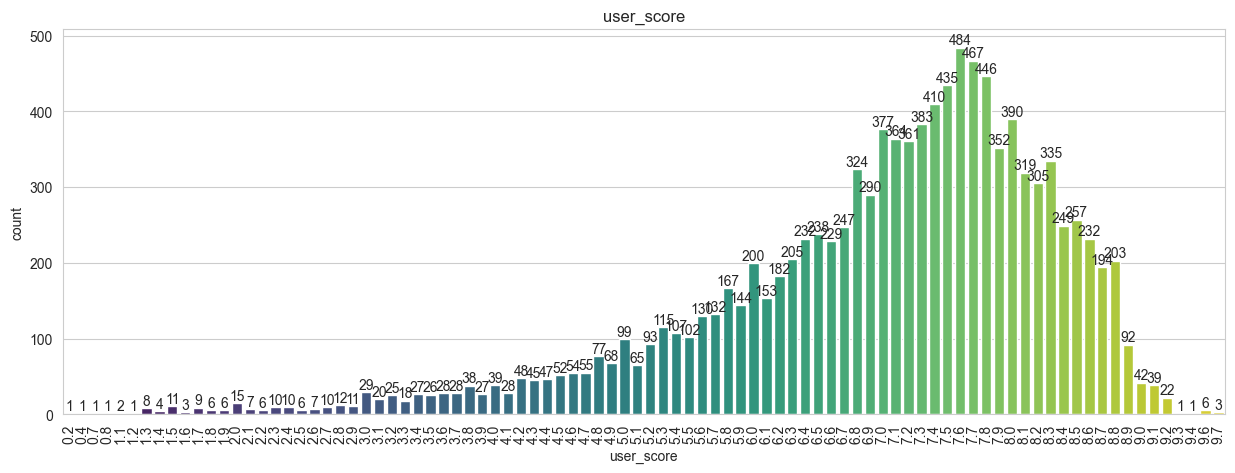

In [61]:
plt.figure(figsize=(15, 5))
plt.title('user_score')
ax = sns.countplot(data=df, x='user_score', palette='viridis')
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=90)
plt.show()

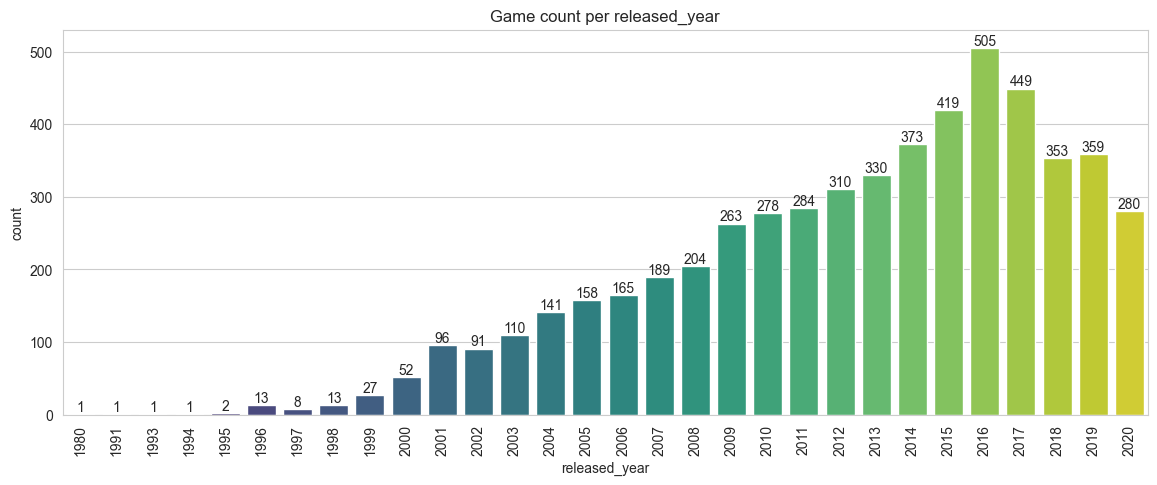

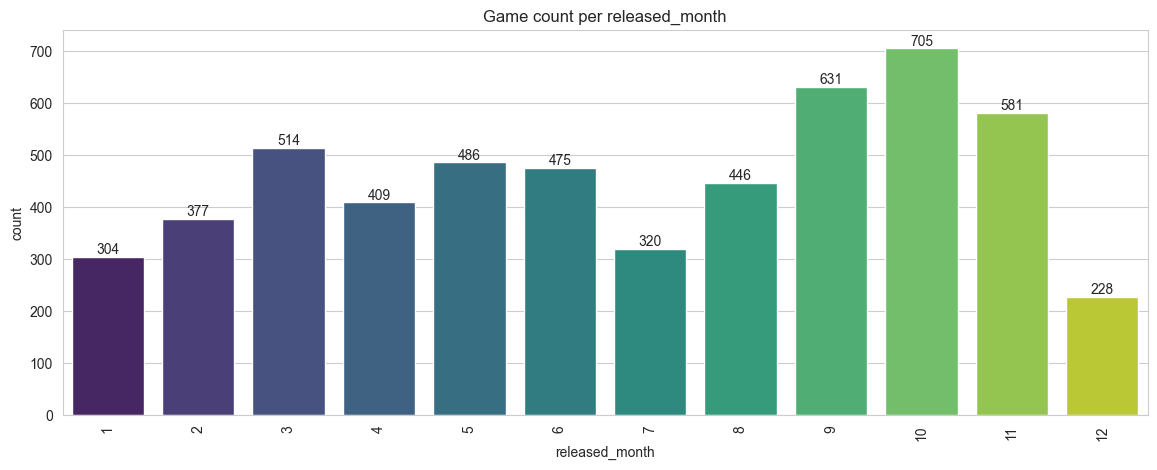

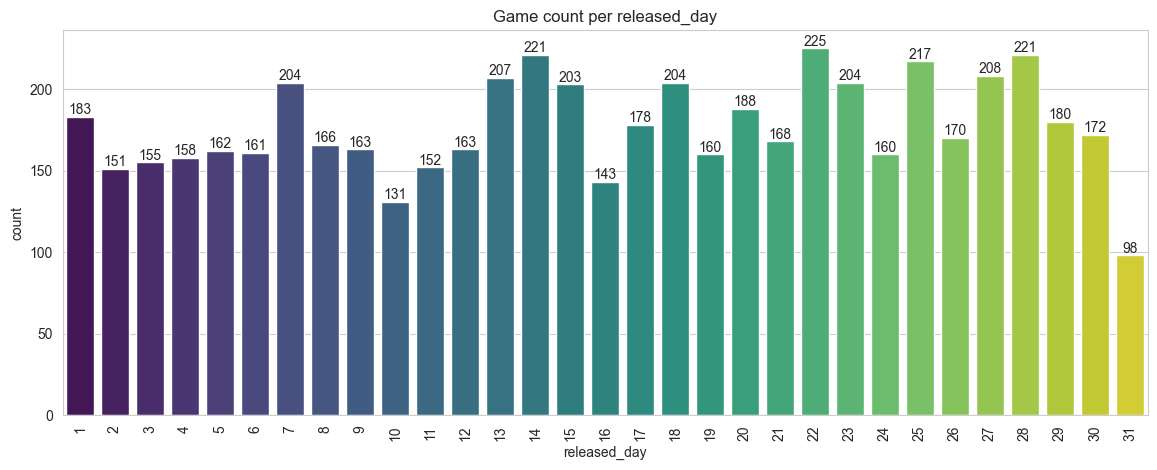

In [ ]:
X =['released_year','released_month','released_day']
for x in X:
    plt.figure(figsize=(14, 5))
    plt.title(f'Game count per {x}')
    ax = sns.countplot(data=df, x=x, palette='viridis')
    for container in ax.containers:
        ax.bar_label(container)
    plt.xticks(rotation=90)
    plt.show()

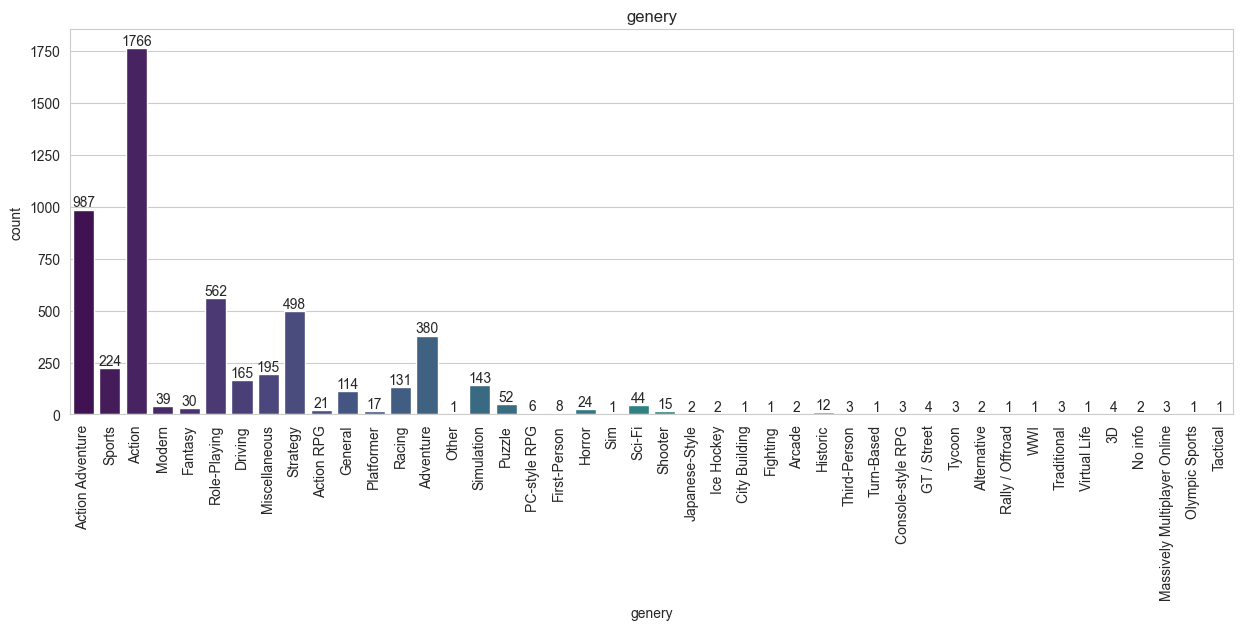

In [ ]:
plt.figure(figsize=(15, 5))
plt.title('genery')
ax = sns.countplot(data=df, x='genery', palette='viridis')
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=90)
plt.show()

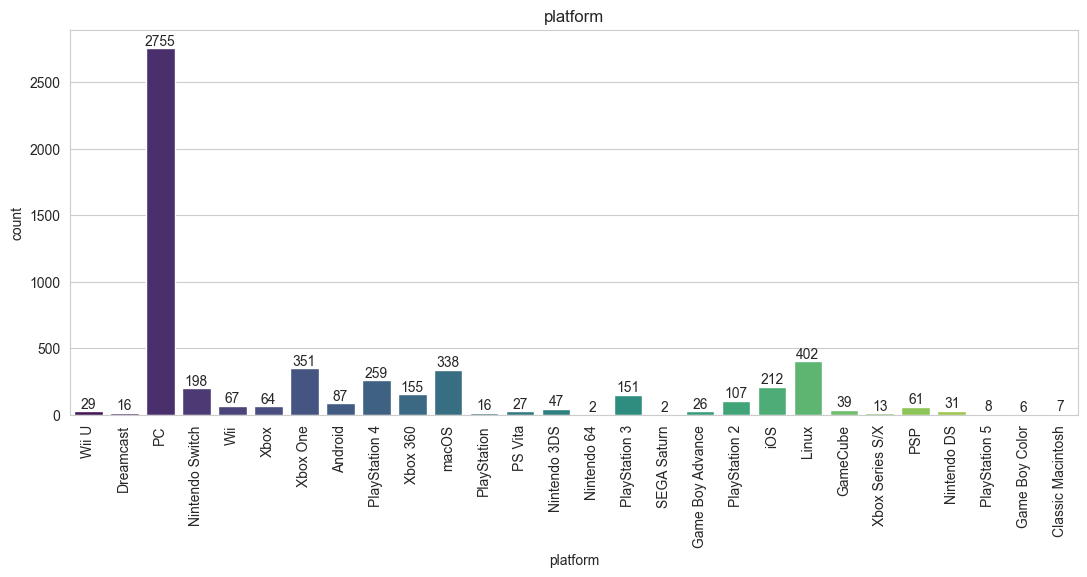

In [ ]:
plt.figure(figsize=(13, 5))
plt.title('platform')
ax = sns.countplot(data=df, x='platform', palette='viridis')
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=90)
plt.show()

### **Esplorazione variabili Numeriche**

In [ ]:
def plot_num(df, columns):
    for i, column in enumerate(columns):
        plt.subplot(int(len(columns) / 2) + 1, 2, i + 1)
        sns.histplot(x=column, data=df, bins=30, kde=True)
        plt.axvline(df[column].mean(), color="r", linestyle="--", label="Mean")
        plt.axvline(df[column].median(), color="g", linestyle="-", label="Median")
        plt.grid()
        plt.title(f"{column} Distribution")
        plt.legend()
        plt.tight_layout()

    plt.show()

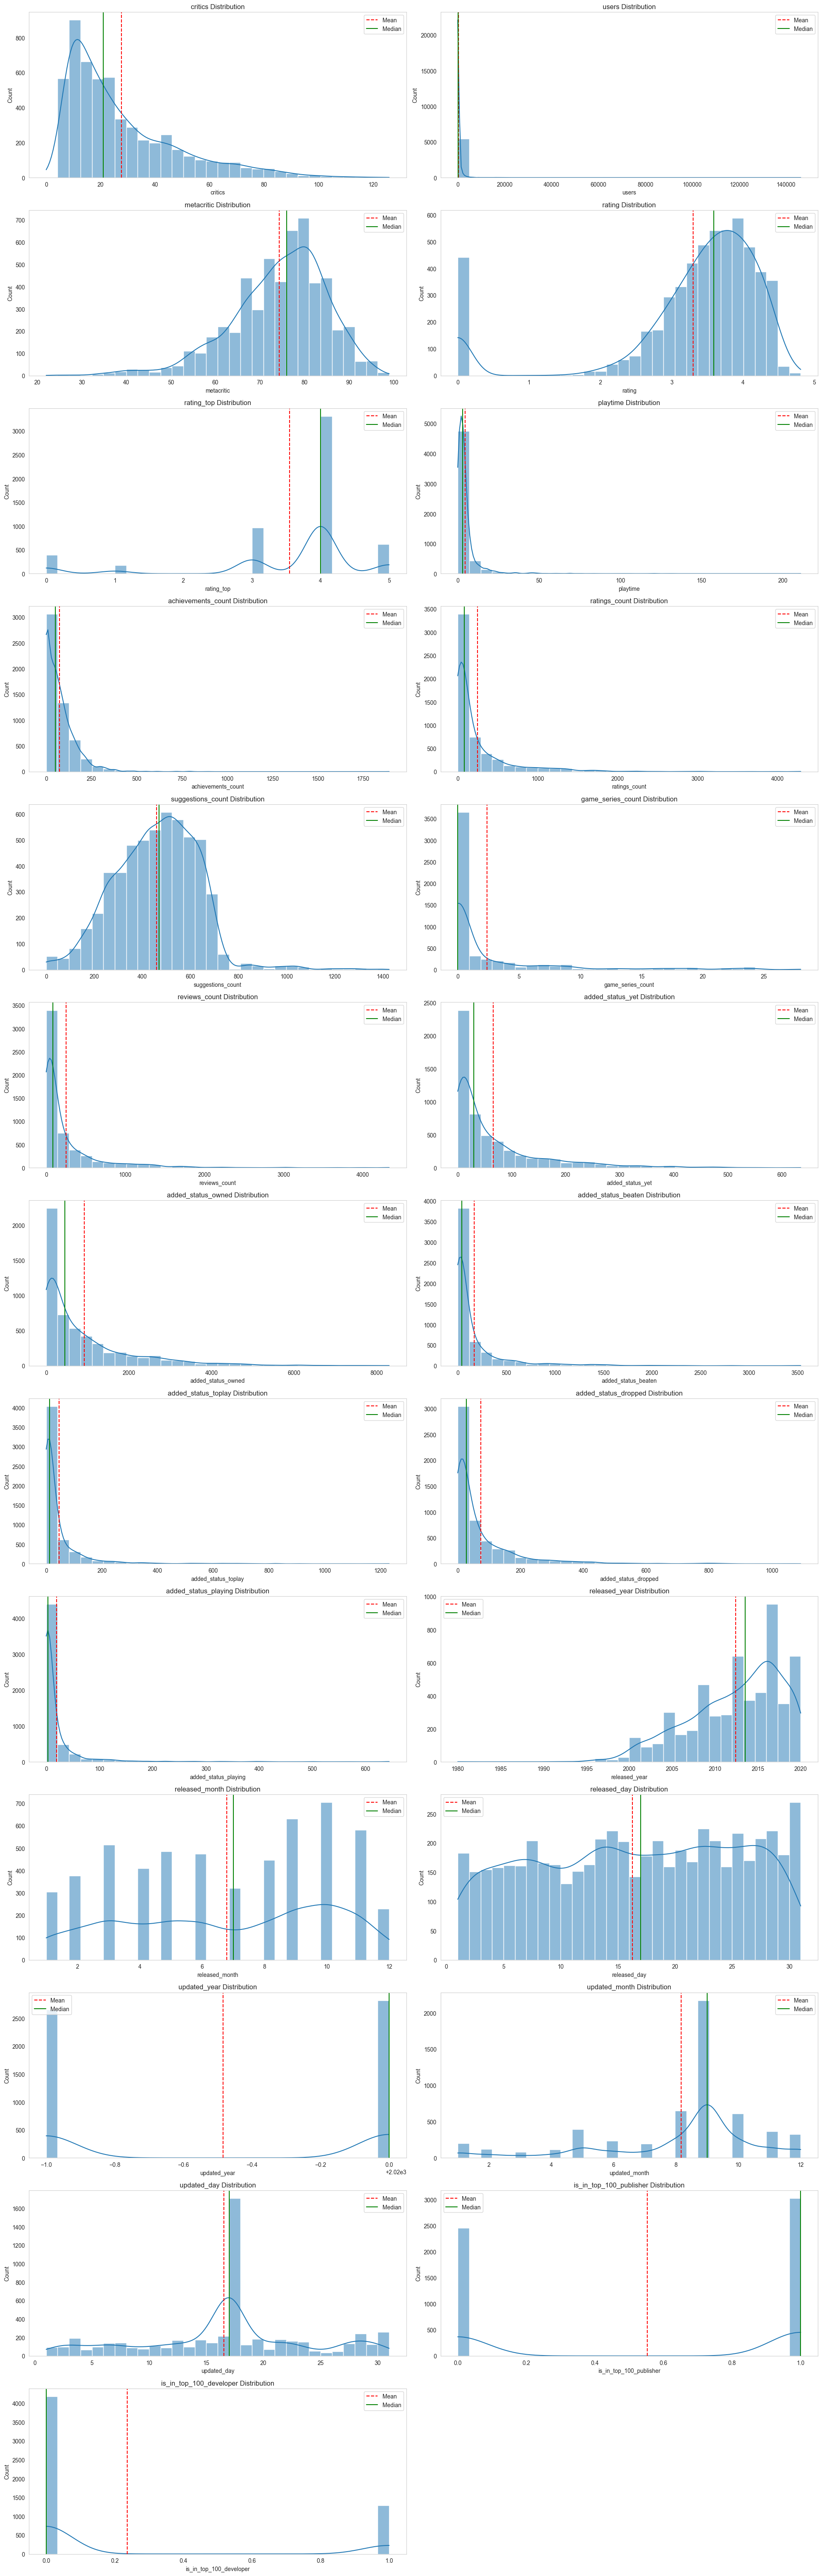

In [ ]:
plt.figure(figsize=(20, len(numerical_variables) * 2.5))
plot_num(df, numerical_variables)